In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans
# from sklearn.cluster import AgglomerativeClustering
# import scipy.cluster.hierarchy as shc
# from sklearn.cluster import DBSCAN
# from sklearn.mixture import GaussianMixture
# from sklearn.cluster import MeanShift
# from sklearn.cluster import estimate_bandwidth
from sklearn import metrics
from sklearn.decomposition import PCA
import io
import warnings 
warnings.filterwarnings('ignore')


In [2]:
 # IMPORTING  DATA
dataset = pd.read_csv('september 2022 Sales raw data.xlsx - september raw data.csv')
dataset.head()

,#,BP Code,BP Name,Customer Site,Location,Profile,Sector,Supplier,Product,Bandwidth,...,Total Sales,Start Date,End Date,Agreement Status,Account Manager,AM comment,Month(change),Changes,Change description,Comment/Change
0,2108.0,C003985,ABAHIZI SACCO GIKONDO,HQ,Kicukiro,Government,BANK,KTRN,4G LTE connectivity,0.0,...,"101,695",9/1/21,8/31/24,A,GASASIRA,NaN,NaN,NaN,NaN,NaN
1,2235.0,C000016,Access Bank Ltd,Exedus,Gasabo,Private,BANK,KTRN,Fiber Broadband Internet,1.0,...,"97,458",2/1/20,11/30/21,A,MUKAMANA,NaN,NaN,NaN,NaN,NaN
2,2233.0,C000016,Access Bank Ltd,HQ,Nyarugenge,Private,BANK,KTRN,4G LTE connectivity,0.0,...,"20,339",2/1/20,11/30/21,A,MUKAMANA,NaN,NaN,NaN,NaN,NaN
3,2234.0,C000016,Access Bank Ltd,HQ,Nyarugenge,Private,BANK,KTRN,Fiber Broadband Internet,20.0,...,"1,211,864",2/1/20,11/30/21,A,MUKAMANA,NaN,NaN,NaN,NaN,NaN
4,1681.0,C000043,AFRICA OLLEH SERVICES (AOS),AOS HQ,Gasabo,Private,TECH,KTRN,Fiber Broadband Internet,50.0,...,"1,800,000",1/1/21,12/31/23,A,BANZA,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.drop(["AM comment","Month(change)","Changes","Changes","Change description","Comment/Change"], axis=1, inplace=True)

In [4]:
dataset.drop(["End Date","Start Date","Sector","Units(kms","Customer Site","BP Name","Item/Service Description"], axis=1,inplace=np.True_)

In [5]:
dataset.drop(['Agreement Status','Account Manager'],axis=1,inplace=True)

In [6]:

dataset.head()

,#,BP Code,Location,Profile,Supplier,Product,Bandwidth,Total bandwidth,Item No.,Quantity,Price,Total Sales
0,2108.0,C003985,Kicukiro,Government,KTRN,4G LTE connectivity,0.0,0.0,I0011,1,"101,695","101,695"
1,2235.0,C000016,Gasabo,Private,KTRN,Fiber Broadband Internet,1.0,1.0,I0099,1,"97,458","97,458"
2,2233.0,C000016,Nyarugenge,Private,KTRN,4G LTE connectivity,0.0,0.0,I0547,1,"20,339","20,339"
3,2234.0,C000016,Nyarugenge,Private,KTRN,Fiber Broadband Internet,20.0,20.0,I0096,1,"1,211,864","1,211,864"
4,1681.0,C000043,Gasabo,Private,KTRN,Fiber Broadband Internet,50.0,50.0,I0598,1,"1,800,000","1,800,000"


In [7]:
dataset['BP Code'].unique()

array(['C003985', 'C000016', 'C000043', 'C000046', 'C004131', 'C003169',
       'C000056', 'C003352', 'C000057', 'C000060', 'C000068', 'C003176',
       'C000072', 'C000131', 'C000144', 'C002339', 'C000158', 'C001227',
       'C000198', 'C000200', 'C000201', 'C000225', 'C000234', 'C002319',
       'C003665', 'C002461', 'C003491', 'C003920', 'C003313', 'C004169',
       'C000313', 'C002183', 'C003303', 'C003175', 'C000325', 'C001392',
       'C002716', 'C000328', 'C003267', 'C000329', 'C002462', 'C003391',
       'C003476', 'C002016', 'C003293', 'C003400', 'C003291', 'C003896',
       'C000332', 'C002182', 'C003332', 'C003461', 'C002713', 'C000344',
       'C003535', 'C003411', 'C000356', 'C000359', 'C003113', 'C000366',
       'C002229', 'C000173', 'C003399', 'C002455', 'C000385', 'C002439',
       'C003472', 'C003408', 'C003530', 'C003534', 'C003483', 'C002121',
       'C002441', 'C003595', 'C001782', 'C002440', 'C003531', 'C003663',
       'C002445', 'C002867', 'C002328', 'C003464', 

In [8]:
#cleaning data : checking null values an d try to clean them 
dataset.isnull().sum()

#                  79
BP Code             0
Location            0
Profile             0
Supplier           69
Product             0
Bandwidth          56
Total bandwidth    55
Item No.            0
Quantity            0
 Price              0
 Total Sales        0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset.isnull().sum()

#                  0
BP Code            0
Location           0
Profile            0
Supplier           0
Product            0
Bandwidth          0
Total bandwidth    0
Item No.           0
Quantity           0
 Price             0
 Total Sales       0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2393
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                2370 non-null   float64
 1   BP Code          2370 non-null   object 
 2   Location         2370 non-null   object 
 3   Profile          2370 non-null   object 
 4   Supplier         2370 non-null   object 
 5   Product          2370 non-null   object 
 6   Bandwidth        2370 non-null   float64
 7   Total bandwidth  2370 non-null   float64
 8   Item No.         2370 non-null   object 
 9   Quantity         2370 non-null   int64  
 10   Price           2370 non-null   object 
 11   Total Sales     2370 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 240.7+ KB


In [12]:
dataset = dataset.reset_index().drop('index',axis=1)

In [13]:
#df.drop(['#'],axis=1,inplace=True)

In [14]:
dataset.tail()

,#,BP Code,Location,Profile,Supplier,Product,Bandwidth,Total bandwidth,Item No.,Quantity,Price,Total Sales
2365,1114.0,C003018,Gasabo,Government,KTRN,Fiber Broadband Internet,20.0,20.0,I0589,1,"900,000","900,000"
2366,1112.0,C003018,Kayonza,Government,KTRN,Fiber Broadband Internet,20.0,20.0,I0589,1,"900,000","900,000"
2367,1111.0,C003018,Muhanga,Government,KTRN,Fiber Broadband Internet,7.0,7.0,I0445,1,"330,000","330,000"
2368,1113.0,C003018,Muhanga,Government,KTRN,Fiber Broadband Internet,10.0,10.0,I0094,1,"510,000","510,000"
2369,2042.0,C002572,Kicukiro,Private,KTRN,Fiber Broadband Internet,1.0,1.0,I0090,1,"270,000","270,000"


In [15]:
#value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring
dataset['Profile'].value_counts(normalize=True)

Government           0.878481
Private              0.097890
Government scheme    0.023629
Name: Profile, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

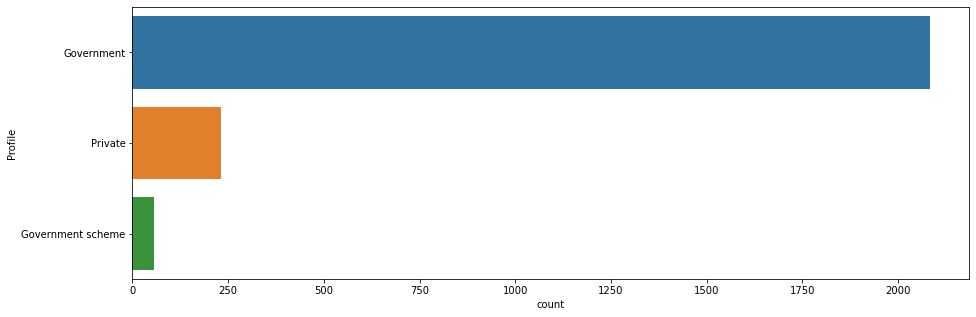

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(y='Profile',data=dataset)
plt.show

In [17]:
#dataset['Profile'].value_counts(normalize=True)

<function matplotlib.pyplot.show(close=None, block=None)>

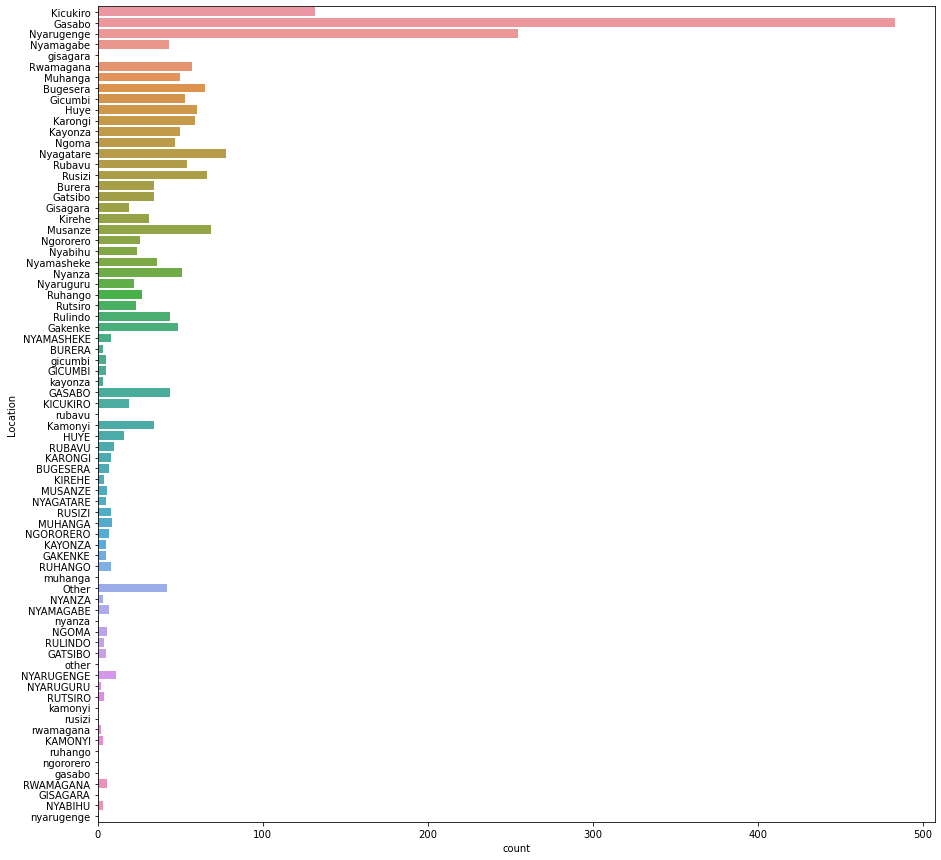

In [18]:
plt.figure(figsize=(15,15))
sns.countplot(y='Location',data=dataset)
plt.show

In [19]:
dataset["Product"].value_counts(normalize=True)

Fiber Broadband Internet      0.446414
4G LTE connectivity           0.417300
MSS                           0.056540
Video Conferencing Service    0.029114
Cloud Computing               0.016456
VSAT                          0.010127
DARK FIBER LEASE              0.008861
VOIP                          0.007595
Fixed Wireless Internet       0.006329
Localized Content             0.001266
Name: Product, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

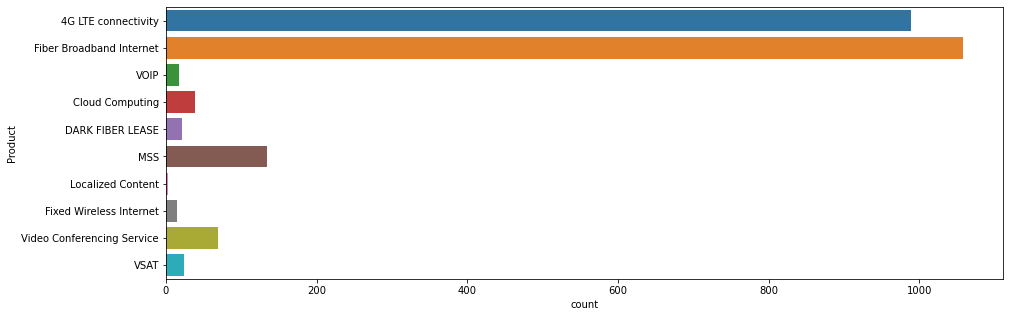

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(y='Product',data=dataset)
plt.show

In [21]:
dataset["Supplier"].value_counts(normalize=True)

KTRN        0.854008
BSC         0.088186
GENNEXT     0.055696
Simbanet    0.001688
EUCL        0.000422
Name: Supplier, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

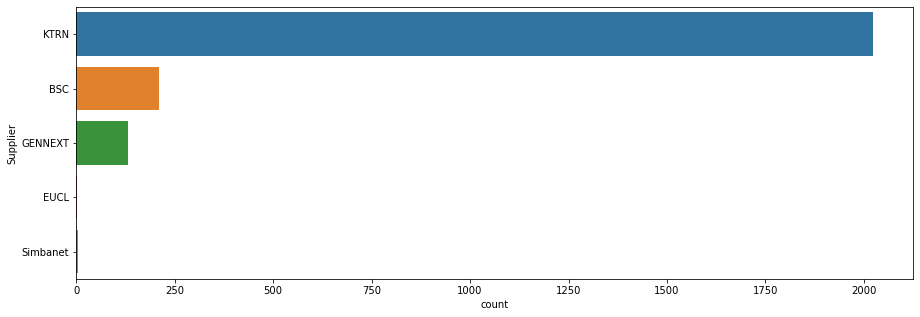

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(y='Supplier',data=dataset)
plt.show

In [23]:
dataset["BP Code"].value_counts(normalize=True)

C002295    0.092405
C002394    0.027848
C001790    0.025316
C002675    0.023629
C002437    0.023207
             ...   
C002465    0.000422
C001229    0.000422
C003330    0.000422
C003148    0.000422
C001421    0.000422
Name: BP Code, Length: 692, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

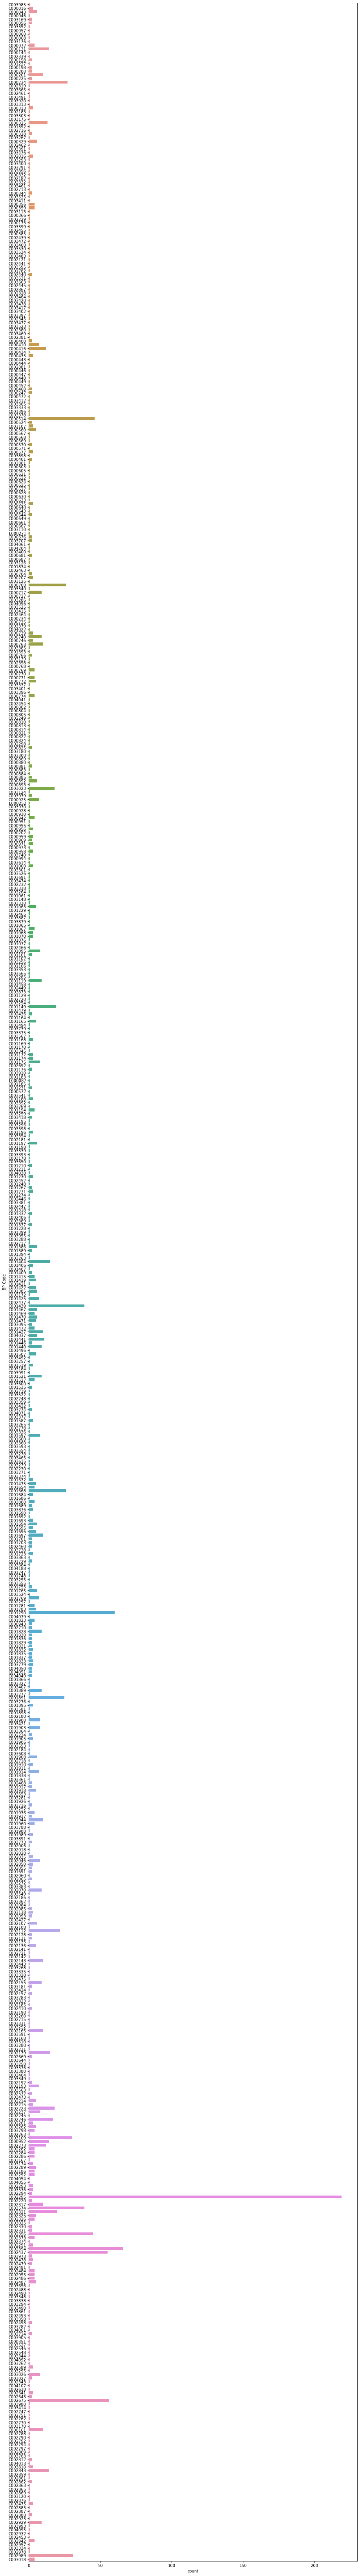

In [24]:
plt.figure(figsize=(15,120))
sns.countplot(y='BP Code',data=dataset)
plt.show

In [25]:
from pandas._libs.hashtable import value_count


In [26]:
#for col in ['Profile', 'Product', 'Supplier', 'Location']:
    #df[col] = df[col].astype('object')

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


In [28]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [35]:
df1=MultiColumnLabelEncoder(columns = ['Profile', 'Product','Item No.','BP Code','Supplier', 'Location']).fit_transform(dataset)


In [45]:
# from sklearn.preprocessing import StandardScaler

# # df1 = pd.DataFrame({'x' : np.random.uniform(low=0, high=10, size=1000)})
# # df2 = pd.DataFrame({'x' : np.random.uniform(low=0, high=10, size=850)})

# scaler = StandardScaler()
# new_col = scaler.fit_transform(df1[['dataset']])
# new_col1 = scaler.transform(df2[['dataset']])

In [43]:
# #standard scaler:The main idea is to normalize/standardize i.e. μ = 0 and σ = 1 your features/variables/columns of X, individually, before applying any machine learning model
# scaler=StandardScaler()
# df2=scaler.fit_transform(df1.dataset)
# #df3=normalize(df2)
# #df4=pd.DataFrame(df3)

In [44]:
# df3.head()

In [ ]:
#normalize refers to rescaling  real valued numeric attributes into range 0 and 1
#norm=normalize(df2)

<b><h1>UNIVARIATE ANALYSIS</h1></b>


In [ ]:
df1.describe()

In [ ]:
#df2['BP Code'].str.replace('C','')


In [ ]:
#df2['Item No.'].str.replace('I','')

columns=[]

In [ ]:
df1.info()

In [ ]:
df1['BP Code'].value_counts()

In [ ]:
sns.distplot(df3);

In [ ]:
columns =['BP Code', 'Location', 'Profile', 'Supplier', 'Product', 'Bandwidth',
       'Total bandwidth', 'Item No.', 'Quantity', 'Price', 'Total Sales']
for i in columns:  
  plt.figure()
  sns.distplot(df1[i])  
  # we runt this code as way of displaying multiple varibales at the same time    

In [ ]:
columns =[0,1,2,3,4,5,6,7,8,9,10]
for i in columns:  
  plt.figure()
  sns.distplot(df3[i])  
#   # we runt this code as way of displaying multiple varibales at the same time    

In [ ]:
sns.kdeplot(df1['Total Sales'],shade=True,hue=df1['Profile']);

from the above diagram we can see the distribution of our data, where  the govermrnt profile is so much frequent here 

In [ ]:
columns =['BP Code', 'Location', 'Supplier', 'Product', 'Bandwidth',
       'Total bandwidth', 'Item No.', 'Quantity', 'Price', 'Total Sales']
for i in columns:  
  plt.figure()
  sns.kdeplot(df1[i],shade=True,hue=df1['Profile']); 


In [ ]:
df['Supplier'].value_counts(normalize=True)

 let try to visulaize using box plot 

In [ ]:
columns =['BP Code', 'Location', 'Supplier', 'Product', 'Bandwidth',
       'Total bandwidth', 'Item No.', 'Quantity', 'Price', 'Total Sales']
for i in columns:  
  plt.figure()
  sns.boxplot(data=df1,x='Profile',y=df1[i]);

From the above tdiagrams we can see how profiles is behaving  on  different variables


# will come back to analyse where data is concentrated specificlly on thoe varibales  

<h1><b>Bivariate analyisis</h1></b>

In [ ]:
sns.scatterplot(data=df)

In [ ]:
sns.scatterplot(data=df)

In [ ]:
sns.pairplot(df)

In [ ]:
sns.pairplot(df4)

  the above diagrams give additonal information 

In [ ]:
sns.pairplot(df1,hue='Profile')

In [ ]:
df1.groupby(['Profile'])['BP Code', 'Location', 'Supplier', 'Product', 'Bandwidth',
       'Total bandwidth', 'Item No.', 'Quantity', 'Price', 'Total Sales'].mean()

In [ ]:
print(df.columns.get_loc("Profile"))

In [ ]:
print(df.columns.get_loc("BP Code"))

In [ ]:
print(df.columns.get_loc("Total Sales"))

In [ ]:
print(df.columns.get_loc("Product"))

In [ ]:
from IPython.core.pylabtools import figsize

sns.relplot(x=4,y=10,data=df4)

In [ ]:
df1.corr()

In [ ]:
df1.corr()

In [ ]:
sns.heatmap(df4.corr(),annot=True,cmap='coolwarm')

completed exploratoty analysis as way of undersanding and gaining more insights from our data

<h1> clustering:Univariate, multivariate and bivariate</h1>

In [ ]:
clustering1 =KMeans(n_clusters=2)

In [ ]:
# clustering1.fit(df[['Total Sales']])

In [ ]:
clustering1.fit(df1[['Total Sales']])

In [ ]:

clustering1.labels_

In [ ]:
df1['Total Sales cluster']= clustering1.labels_
df4.head()

In [ ]:
df1['Total Sales']= clustering1.labels_
df1.head()

In [ ]:
clustering1.inertia_

In [ ]:
# df1['total sales cluster']=clustering1.labels_

In [ ]:
# df.head()

In [ ]:
df1.head()

In [ ]:
# df['Total Sales cluster'].value_counts()

In [ ]:
df1['Total Sales'].value_counts()

In [ ]:

# intertia_score=[]
# for i in range(1,11):
#   kmeans=KMeans(n_clusters=i)
#   kmeans.fit(df[['Total Sales']])
#   intertia_score.append(kmeans.inertia_)

In [ ]:

intertia_score=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df1[['Total Sales']])
  intertia_score.append(kmeans.inertia_)

In [ ]:
intertia_score

In [ ]:
import matplotlib.pyplot as plt 


In [ ]:
plt.plot(range(1,11),intertia_score)

In [ ]:
plt.plot(figsize=(10,8))
sns.scatterplot(data=df4,x=10, hue='Total Sales cluster')

In [ ]:
df4.groupby('Total Sales cluster')[0,1,2,3,4,5,6,8,9,10].mean()

In [ ]:
df.columns

In [ ]:
#bivariate

In [ ]:
df.columns

In [ ]:
clustering2 =KMeans()
clustering2.fit(df1[['Total Sales','Item No.']])
clustering2.labels_
df1['total sales and product cluster']=clustering2.labels_

In [ ]:
intertia_score2=[]
for i in range(1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df1[['Total Sales','Item No.']])
  intertia_score2.append(kmeans2.inertia_)

In [ ]:
plt.plot(range(1,11),intertia_score2)

In [ ]:
clustering2.cluster_centers_

In [ ]:
plt.plot(figsize=(10,8))
sns.scatterplot(data=df1,x='Total Sales', y='Item No.', hue='total sales and product cluster',palette='tab10')

In [ ]:
# df1['total sales cluster'].value_counts()

now we can how many are in each cluster and the majority are in cluster zero, we should find out the ideal number of clusters,to do that we can implement  this

In [ ]:
# elbow method should work to find out the number of clusters,by using clustering metric called inertia

In [ ]:
# #inertia presents the distance btween centroids, gives score
# clustering1.inertia_

In [ ]:
# from socket import socket

In [ ]:
# inertia_score=[]
# for i in range(1,11):
#   kmeans=KMeans(n_clusters=i)
#   kmeans.fit(df1[['Total Sales']])
#   inertia_score.append(kmeans.inertia_)

In [ ]:
# inertia_score

In [ ]:
# plt.plot(range(1,11)),inertia_score

mean  for different varibales is different  for all profiles

In [ ]:
scaler= StandardScaler()
df2=scaler.fit_transform(df1)

In [ ]:
norm=normalize(df2)

In [ ]:
df3=pd.DataFrame(norm)

In [ ]:
scores=[]
for k in range(2,15):
  km=KMeans(n_clusters=k,random_state=123)
  km=km.fit(df4)
  scores.append(km.inertia_)
dfk=pd.DataFrame({'cluster':range(2,15),'score':scores}) 
plt.figure(figsize=(8,5)) 
plt.plot(dfk['cluster'],dfk['score'],marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show

In [ ]:
#The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other
#clusters (separation).

In [ ]:
from pandas.core.common import random_state


In [ ]:
for i in range(5,11):
  kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df1)
  print("silhouttete score for{} clusters k-means :{}".format(i,metrics.silhouette_score(df3,kmeans_labels,metric='euclidean').round(3)))

       

In [ ]:
for i in [6,7,8]:
  kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df3)
  print('Davies Bouldin score:'+str(metrics.davies_bouldin_score(df3,kmeans_labels).round(3)))

In [ ]:
df1['clusters']=list(kmeans_labels)
customers=pd.DataFrame(df1['clusters'].value_counts()).rename(columns={'clusters':'number of customers'})
customers.T

we have 7 customer types. Let’s try to understand behaviours or labels of customers.

In [ ]:
means=pd.DataFrame(df1.describe().loc['mean'])
means.T.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]].round(1)

In [ ]:
df1.set_index('clusters')
grouped=df1.groupby(by='clusters').mean().round(1)
grouped.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]